# State abundance analysis comparison between perturbations and relative controls - Figure 6B

In [1]:
%matplotlib inline

import os
import helper_functions_GSE164638 as hf

import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt

## Import/Export Directories

In [2]:
# for AnnData objects from Scanpy:
# These AnnData objects contain output from the filtering and QC notebook
# Containing unnormalized counts matrices with low-count barcodes removed
h5ad_dir = '_h5ad_files'
os.makedirs(h5ad_dir, exist_ok=True)

# for plots from matplotlib, seaborn, helper functions plots:
plot_dir = '_plots_abundance_analysis'
os.makedirs(plot_dir, exist_ok=True)

## Plotting Settings

In [3]:
# scanpy
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                     frameon=True, vector_friendly=True, fontsize=14, 
                     figsize=None, color_map=None, format='eps', 
                     facecolor=None, transparent=False, ipython_format='png2x')

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figure

In [4]:
# matplotlib params:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=12)
plt.rcParams['pdf.fonttype'] = 42

# seaborn
sns.set(context='notebook', style='white', font_scale=0.5)

## Load single cell data

In [5]:
adata = sc.read(f'{h5ad_dir}/adata_merged_annotated_perturbations.h5ad')

In [6]:
# optionally restrict to cells which have at least 1000 counts

### Split the data into experiments

In [7]:
adata_36 = adata[adata.obs['duration'].isin(['36h'])]

In [8]:
adata_12 = adata[adata.obs['duration'].isin(['12h'])]

### Split the experiment data by treatment condition

In [9]:
adata_36_dmso = adata_36[adata_36.obs['treatment'].isin(['DMSO'])]

In [10]:
adata_36_cftr = adata_36[adata_36.obs['treatment'].isin(['CFTR-inh172'])]

In [11]:
adata_12_dmso = adata_12[adata_12.obs['treatment'].isin(['DMSO'])]

In [12]:
adata_12_forsk = adata_12[adata_12.obs['treatment'].isin(['Forskolin'])]

In [13]:
# count only the 845 cells that meet the criteria for abundance plots (makes insignificant difference)
adata_12_forsk = adata_12_forsk[adata_12_forsk.obs.loc[adata_12_forsk.obs['n_counts'] >= 1000].index] 

## Get abundances and plot

### Get pandas dataframe of abundance levels for each state of interest

In [14]:
abund_36_dmso = hf.abundance_df(adata_36_dmso, 'state_coarse_grain')

In [15]:
abund_36_cftr = hf.abundance_df(adata_36_cftr, 'state_coarse_grain')

In [16]:
abund_12_dmso = hf.abundance_df(adata_12_dmso, 'state_coarse_grain')

In [17]:
abund_12_forsk = hf.abundance_df(adata_12_forsk, 'state_coarse_grain')

### Rename the abundance columns from their default settings (so you can merge them later)

In [18]:
abund_36_dmso['DMSO 36 abundance'] = abund_36_dmso['state_coarse_grain_abundance']
abund_36_dmso['DMSO 36 Log2 abundance'] = abund_36_dmso['state_coarse_grain_log2_abundance']

In [19]:
abund_36_cftr['CFTR-inh172 abundance'] = abund_36_cftr['state_coarse_grain_abundance']
abund_36_cftr['CFTR-inh172 Log2 abundance'] = abund_36_cftr['state_coarse_grain_log2_abundance']

In [20]:
abund_12_dmso['DMSO 12 abundance'] = abund_12_dmso['state_coarse_grain_abundance']
abund_12_dmso['DMSO 12 Log2 abundance'] = abund_12_dmso['state_coarse_grain_log2_abundance']

In [21]:
abund_12_forsk['Forskolin abundance'] = abund_12_forsk['state_coarse_grain_abundance']
abund_12_forsk['Forskolin Log2 abundance'] = abund_12_forsk['state_coarse_grain_log2_abundance']

### Sort the dataframes alphabetically by state

In [22]:
abund_36_dmso = abund_36_dmso.sort_values('state')
abund_36_cftr = abund_36_cftr.sort_values('state')
abund_12_dmso = abund_12_dmso.sort_values('state')
abund_12_forsk = abund_12_forsk.sort_values('state')

### Merge the dataframes by experiment (now that we have abundances)

In [23]:
abundance_merge_12_df = abund_12_forsk.merge(abund_12_dmso, on='state')

In [24]:
abundance_merge_36_df = abund_36_cftr.merge(abund_36_dmso, on='state')

In [25]:
abundance_merge_all_df = abundance_merge_12_df.merge(abundance_merge_36_df , on='state')

## Take a look at raw % abundances

In [26]:
abundance_df_abr = abundance_merge_all_df[["state", "Forskolin abundance", "DMSO 12 abundance", "DMSO 36 abundance", "CFTR-inh172 abundance"]]

In [27]:
abundance_df_abr['Forskolin Abundance Pct'] = abundance_df_abr['Forskolin abundance']*100
abundance_df_abr['DMSO 12h Abundance Pct'] = abundance_df_abr['DMSO 12 abundance']*100
abundance_df_abr['CFTR-inh172 Abundance Pct'] = abundance_df_abr['CFTR-inh172 abundance']*100
abundance_df_abr['DMSO 36 Abundance Pct'] = abundance_df_abr['DMSO 36 abundance']*100

<ipython-input-27-74a7f1c9c8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abundance_df_abr['Forskolin Abundance Pct'] = abundance_df_abr['Forskolin abundance']*100
<ipython-input-27-74a7f1c9c8e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abundance_df_abr['DMSO 12h Abundance Pct'] = abundance_df_abr['DMSO 12 abundance']*100
<ipython-input-27-74a7f1c9c8e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [28]:
abundance_df_abr_pct = abundance_df_abr[["state", "Forskolin Abundance Pct", "DMSO 12h Abundance Pct", "CFTR-inh172 Abundance Pct", "DMSO 36 Abundance Pct"]]

In [29]:
abundance_df_abr_pct

,state,Forskolin Abundance Pct,DMSO 12h Abundance Pct,CFTR-inh172 Abundance Pct,DMSO 36 Abundance Pct
0,Enterocyte,72.307692,63.187856,57.532861,54.706142
1,Enteroendocrine,2.603550,2.941176,4.550051,3.446752
2,Secretory,7.573964,5.977230,6.167846,9.898365
3,Stem,10.769231,24.288425,28.412538,26.557667
4,Stretch Signature,5.680473,1.802657,2.325581,4.949183
5,Tuft,1.065089,1.802657,1.011122,0.441891


### Calculate Log2(% Perturbation/%Control) abundance

In [30]:
abundance_merge_all_df['Log2(Forskolin%/DMSO%)'] = np.log2((abundance_merge_all_df['Forskolin abundance']*100)/(abundance_merge_all_df['DMSO 12 abundance']*100))

In [31]:
abundance_merge_all_df['Log2(CFTR-inh172%/DMSO%)'] = np.log2((abundance_merge_all_df['CFTR-inh172 abundance']*100)/(abundance_merge_all_df['DMSO 36 abundance']*100))

### Prepare dataframe for plotting

In [32]:
abundance_merge_df_plot_final = abundance_merge_all_df[['Log2(Forskolin%/DMSO%)', 
                                                        'Log2(CFTR-inh172%/DMSO%)']]

In [33]:
abundance_merge_df_plot_final.index = abundance_merge_all_df['state']

In [34]:
abundance_merge_df_plot_final = abundance_merge_df_plot_final.reindex(['Stem', 
                                                              'Enterocyte', 
                                                              'Enteroendocrine', 
                                                              'Secretory', 
                                                              'Tuft', 
                                                              'Stretch Signature'])

In [35]:
abundance_merge_df_plot_final

,Log2(Forskolin%/DMSO%),Log2(CFTR-inh172%/DMSO%)
state,,
Stem,-1.173354,0.097399
Enterocyte,0.194502,0.072683
Enteroendocrine,-0.175913,0.400645
Secretory,0.341572,-0.682423
Tuft,-0.759151,1.194194
Stretch Signature,1.655887,-1.089599


### Calculate the standard error for each experiment

#### Forskolin 12 h treatment
* N12 = # cells total in Forskolin
* M12 = # cells total in DMSO

In [36]:
#Calculate standard error: SE(y) = [1/ln(2)]*sqrt[ 1/n + 1/m - 1/N - 1/M ]
N12 = adata_12_forsk.X.shape[0]
M12 = adata_12_dmso.X.shape[0]


SE_dfF = pd.DataFrame(columns=list(adata_12_forsk.obs['state_coarse_grain'].unique()))

for state in adata_12_forsk.obs['state_coarse_grain'].unique():
    SE_dfF[state] = [1/np.log(2)]*np.sqrt([1/(len(adata_12_forsk.obs.loc[adata_12_forsk.obs['state_coarse_grain'] == state]))\
                                          + 1/(len(adata_12_dmso.obs.loc[adata_12_dmso.obs['state_coarse_grain'] == state]))\
                                         - 1/N12 - 1/M12])

SE_dfF = SE_dfF.transpose().rename(columns={0:'SE Forskolin'})

#### CFTR-inh172 36 h treatment
* N36 = # cells total in CFTR-inh172
* M36 = # cells total in DMSO

In [37]:
#Calculate standard error: SE(y) = [1/ln(2)]*sqrt[ 1/n + 1/m - 1/N - 1/M ]
N36 = adata_36_cftr.X.shape[0]
M36 = adata_36_dmso.X.shape[0]


SE_dfC = pd.DataFrame(columns=list(adata_36_cftr.obs['state_coarse_grain'].unique()))

for state in adata_36_cftr.obs['state_coarse_grain'].unique():
    SE_dfC[state] = [1/np.log(2)]*np.sqrt([1/(len(adata_36_cftr.obs.loc[adata_36_cftr.obs['state_coarse_grain'] == state]))\
                                          + 1/(len(adata_36_dmso.obs.loc[adata_36_dmso.obs['state_coarse_grain'] == state]))\
                                         - 1/N36 - 1/M36])

SE_dfC = SE_dfC.transpose().rename(columns={0:'SE CFTR-inh172'})

In [38]:
SE_df=SE_dfF.merge(SE_dfC, on=SE_dfC.index).rename(columns={'key_0': 'state'})

### Plot fold change in abundances between experiments across states - Figure 6B

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


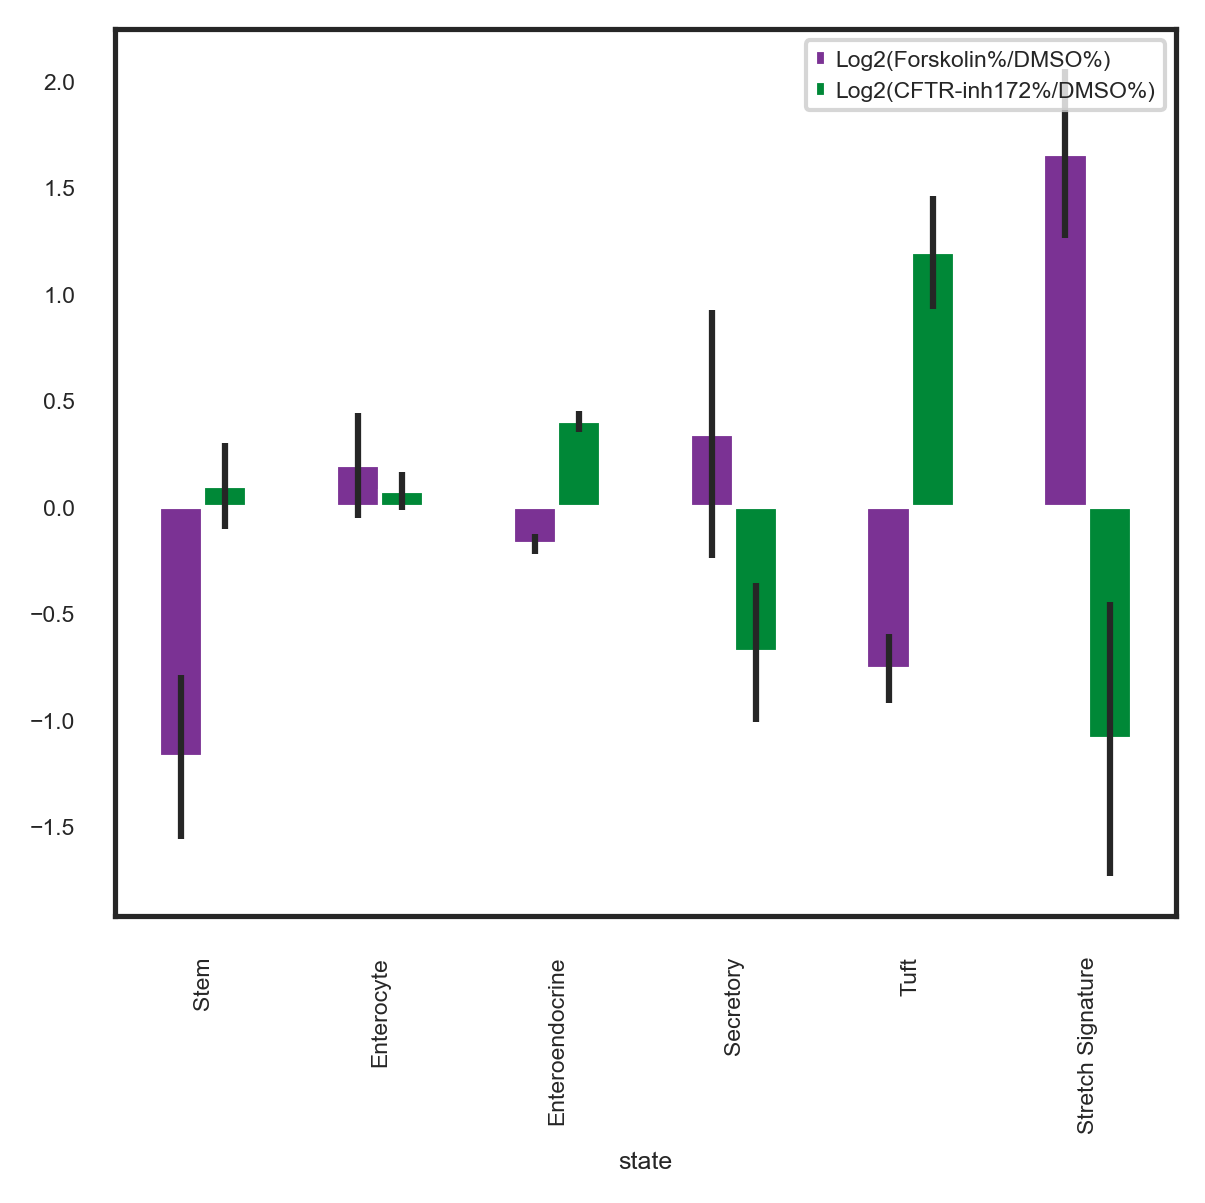

In [39]:
plt.figsize=(10, 10)
ax = abundance_merge_df_plot_final.plot.bar(color=['#7b3294', '#008837'], yerr = SE_df[['SE Forskolin', 'SE CFTR-inh172']].values.T)

plt.tight_layout()
plt.savefig(f'{plot_dir}/Abundance_FC_conditions_strict_tot_counts_perturbations.eps')

### Calculate p-values for each state

In [40]:
pval_dictF = {}

for state in adata_12_forsk.obs['state_coarse_grain'].unique():
    n = len(adata_12_forsk.obs.loc[adata_12_forsk.obs['state_coarse_grain'] == state])
    m = len(adata_12_dmso.obs.loc[adata_12_dmso.obs['state_coarse_grain'] == state])
    pval_dictF[state] = scipy.stats.fisher_exact([[n, N12-n], [m, M12-m]])[1]
    

In [41]:
pval_dictC = {}

for state in adata_12_forsk.obs['state_coarse_grain'].unique():
    n = len(adata_36_cftr.obs.loc[adata_36_cftr.obs['state_coarse_grain'] == state])
    m = len(adata_36_dmso.obs.loc[adata_36_dmso.obs['state_coarse_grain'] == state])
    pval_dictC[state] = scipy.stats.fisher_exact([[n, N36-n], [m, M36-m]])[1]

In [42]:
pval_dfF = pd.DataFrame.from_dict(pval_dictF, orient='index').rename(columns={0:'pval Forsk'})

In [43]:
pval_dfC = pd.DataFrame.from_dict(pval_dictC, orient='index').rename(columns={0:'pval CFTR'})

In [44]:
pval_dfF.merge(pval_dfC, on=pval_dfC.index).rename(columns={'key_0': 'state'}).to_excel('pvals_abundance_fold_change_perturbations_strict_>1000_tot_counts.xlsx')